In [86]:
pip install catboost

In [87]:
import pandas as pd

# Load the data
data = pd.read_csv("train.csv")

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
#check the data type of the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [89]:
#select columns of type objects
cols=data.select_dtypes('O').columns
cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [90]:
int_columns=set(data.columns)-set(cols)
int_columns

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}

In [91]:
integer_columns=list(int_columns)
data_int=data[integer_columns]

data_int

,LotArea,OverallQual,BsmtFinSF2,2ndFlrSF,GarageYrBlt,WoodDeckSF,GrLivArea,ScreenPorch,BedroomAbvGr,YearRemodAdd,...,Id,Fireplaces,OpenPorchSF,KitchenAbvGr,YrSold,3SsnPorch,MiscVal,HalfBath,GarageCars,TotalBsmtSF
0,8450,7,0,854,2003.0,0,1710,0,3,2003,...,1,0,61,1,2008,0,0,1,2,856
1,9600,6,0,0,1976.0,298,1262,0,3,1976,...,2,1,0,1,2007,0,0,0,2,1262
2,11250,7,0,866,2001.0,0,1786,0,3,2002,...,3,1,42,1,2008,0,0,1,2,920
3,9550,7,0,756,1998.0,0,1717,0,3,1970,...,4,1,35,1,2006,0,0,0,3,756
4,14260,8,0,1053,2000.0,192,2198,0,4,2000,...,5,1,84,1,2008,0,0,1,3,1145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,0,694,1999.0,0,1647,0,3,2000,...,1456,1,40,1,2007,0,0,1,2,953
1456,13175,6,163,0,1978.0,349,2073,0,3,1988,...,1457,2,0,1,2010,0,0,0,2,1542
1457,9042,7,0,1152,1941.0,0,2340,0,4,2006,...,1458,2,60,1,2010,0,2500,0,1,1152
1458,9717,5,1029,0,1950.0,366,1078,0,2,1996,...,1459,0,0,1,2010,0,0,0,1,1078


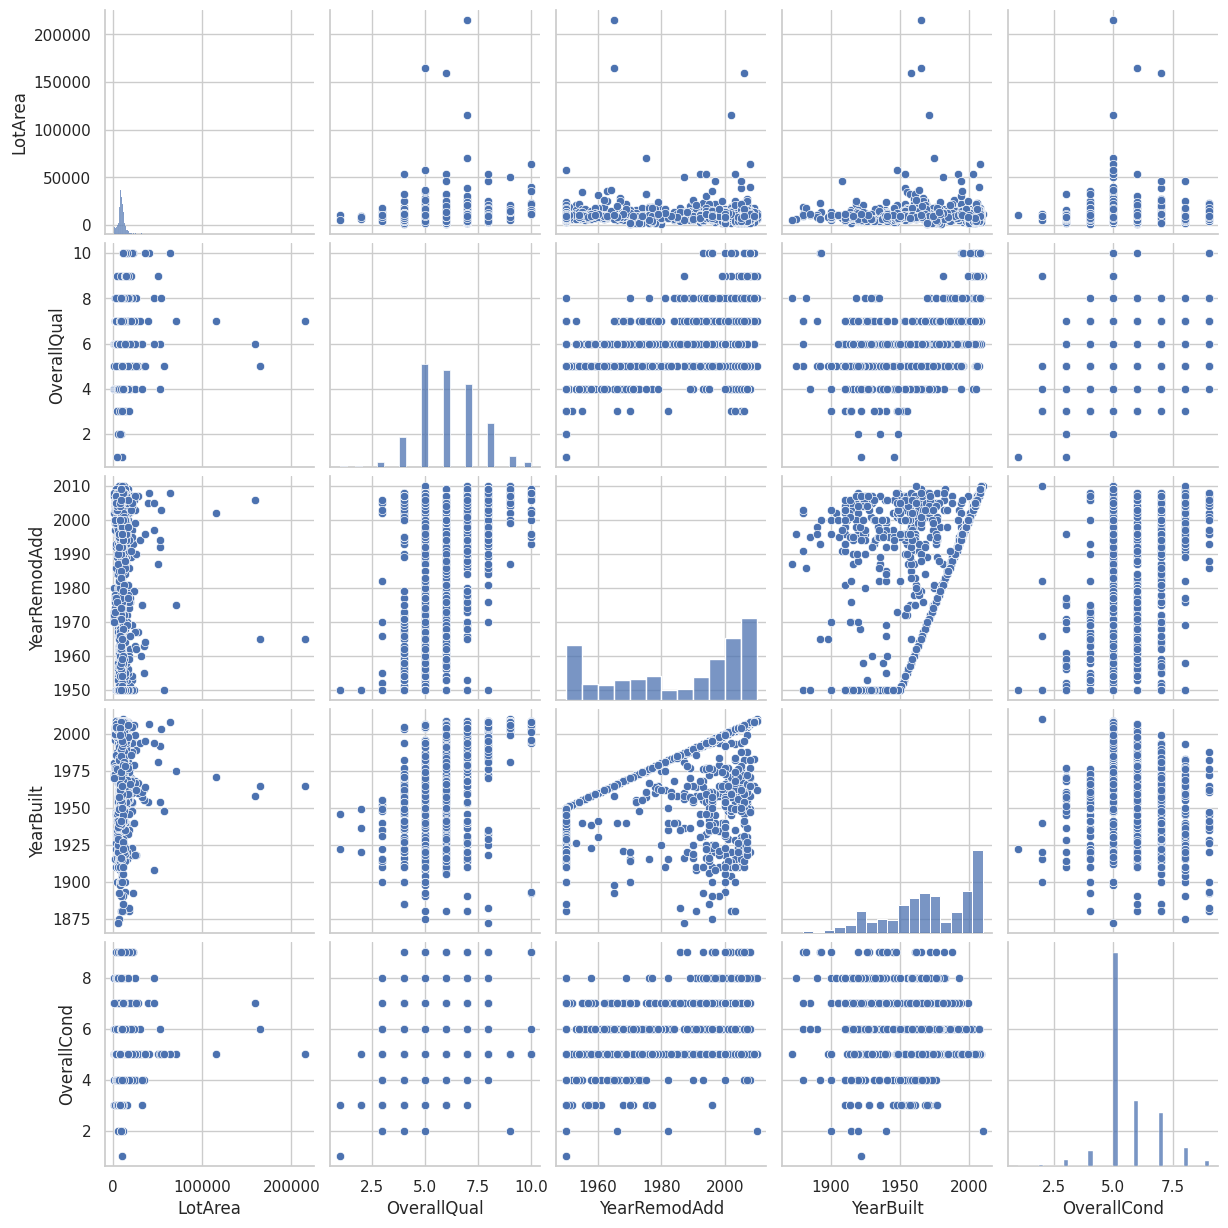

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is a DataFrame containing the columns LotArea, OverallQual, YearRemodAdd, YearBuilt, and OverallCond

sns.pairplot(data[['LotArea', 'OverallQual', 'YearRemodAdd', 'YearBuilt', 'OverallCond']])
plt.show()


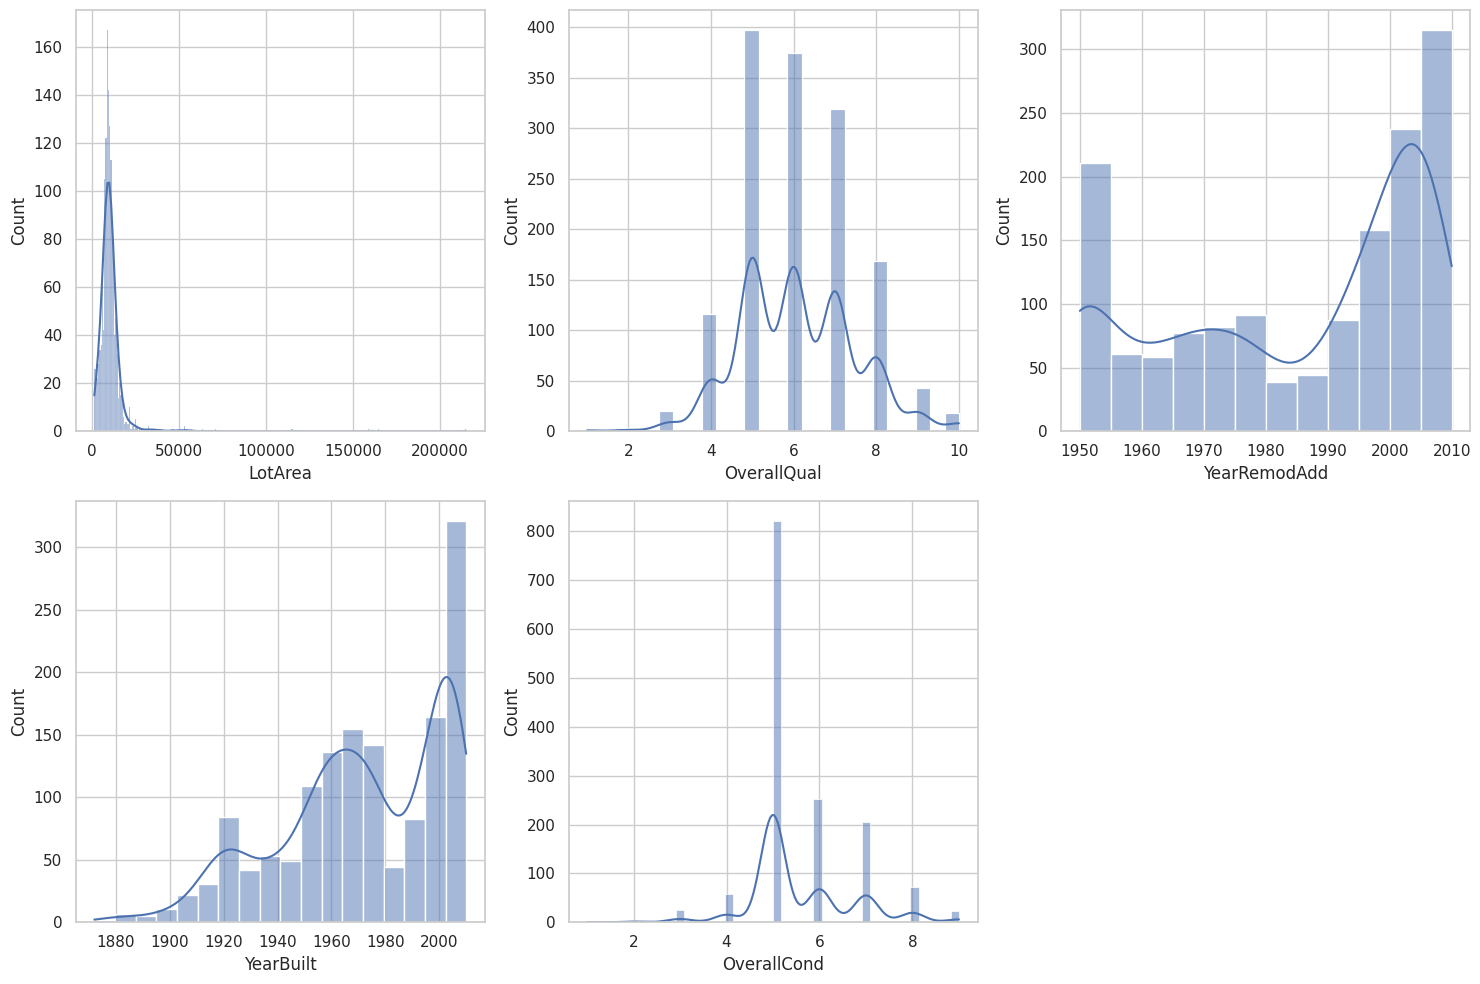

In [93]:
sns.set(style="whitegrid")  # Setting the style

# Creating subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plotting histograms for each variable
sns.histplot(data['LotArea'], ax=axes[0, 0], kde=True)
sns.histplot(data['OverallQual'], ax=axes[0, 1], kde=True)
sns.histplot(data['YearRemodAdd'], ax=axes[0, 2], kde=True)
sns.histplot(data['YearBuilt'], ax=axes[1, 0], kde=True)
sns.histplot(data['OverallCond'], ax=axes[1, 1], kde=True)

# Hiding the empty subplot
axes[1, 2].axis('off')

plt.tight_layout()  # Adjust layout
plt.show()


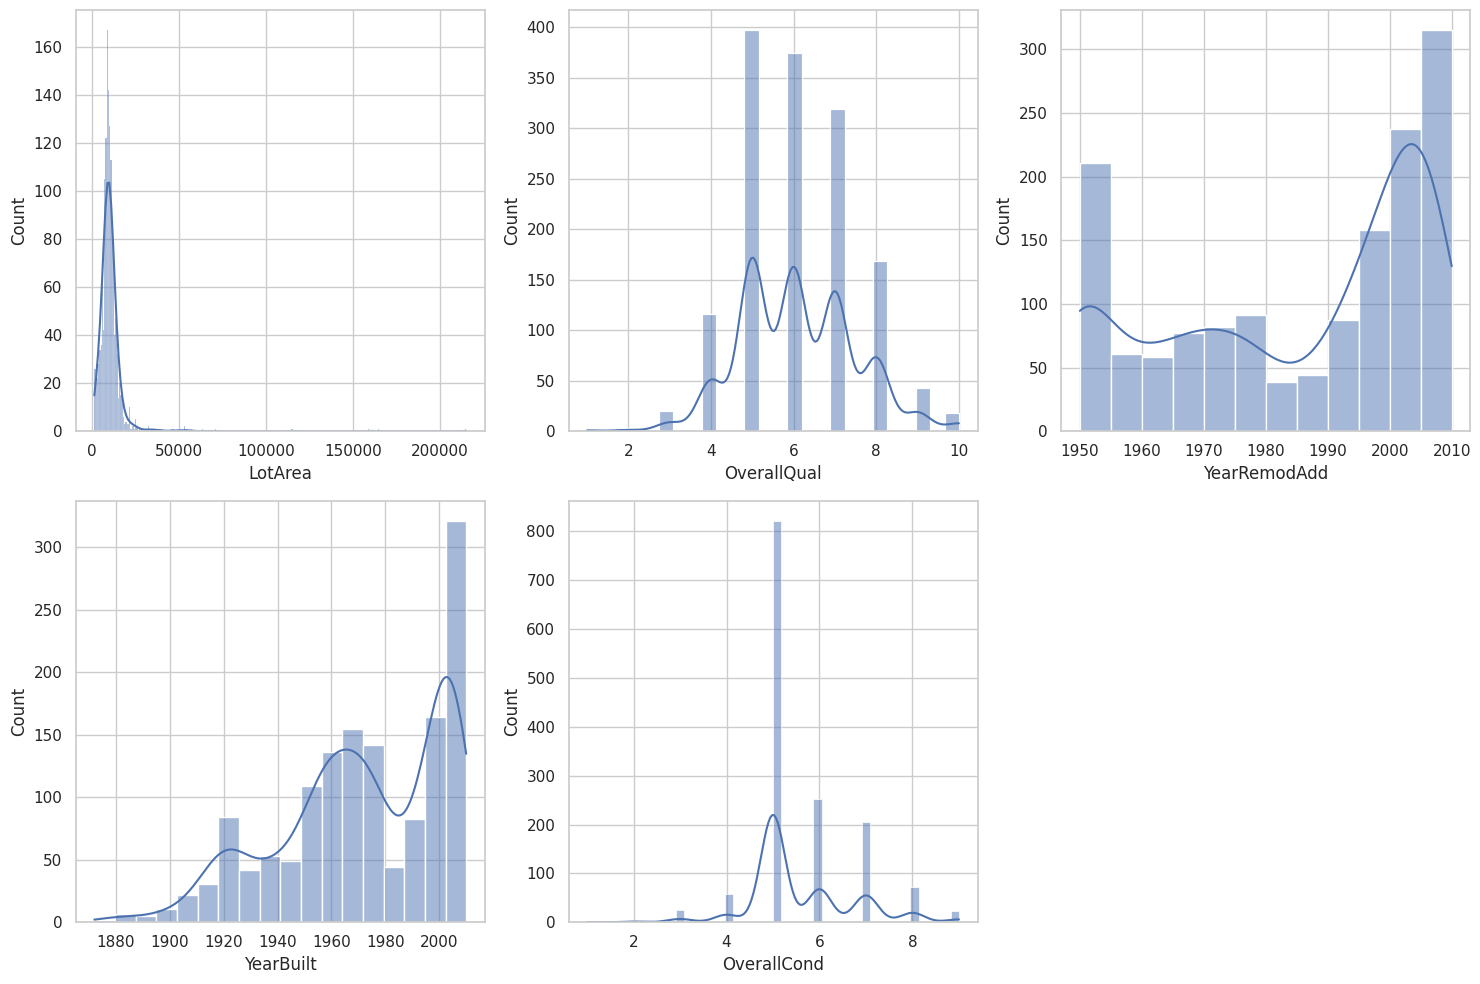

In [94]:
sns.set(style="whitegrid")  # Setting the style

# Creating subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plotting histograms for each variable
sns.histplot(data=data, x='LotArea', kde=True, ax=axes[0, 0])
sns.histplot(data=data, x='OverallQual', kde=True, ax=axes[0, 1])
sns.histplot(data=data, x='YearRemodAdd', kde=True, ax=axes[0, 2])
sns.histplot(data=data, x='YearBuilt', kde=True, ax=axes[1, 0])
sns.histplot(data=data, x='OverallCond', kde=True, ax=axes[1, 1])

# Hiding the empty subplot
axes[1, 2].axis('off')

plt.tight_layout()  # Adjust layout
plt.show()

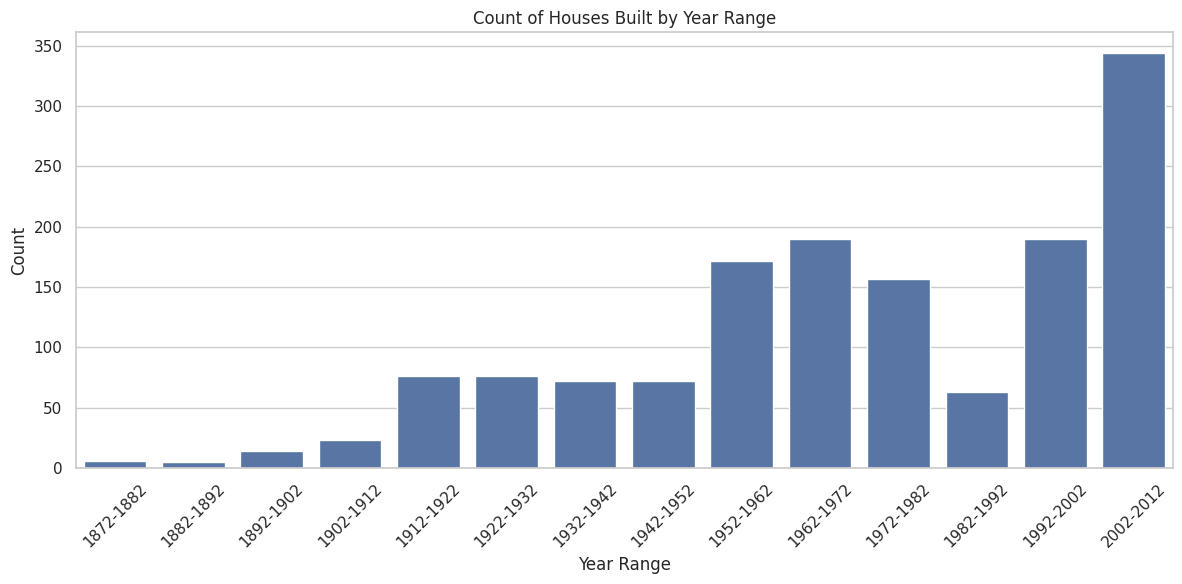

In [95]:
bins = list(range(data['YearBuilt'].min(), data['YearBuilt'].max() + 11, 10))

# Creating labels for the bins
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

# Creating a new categorical column with the labels
data['YearBuiltCategory'] = pd.cut(data['YearBuilt'], bins=bins, labels=labels, right=False)

# Plotting the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='YearBuiltCategory')
plt.xticks(rotation=45)
plt.title('Count of Houses Built by Year Range')
plt.xlabel('Year Range')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

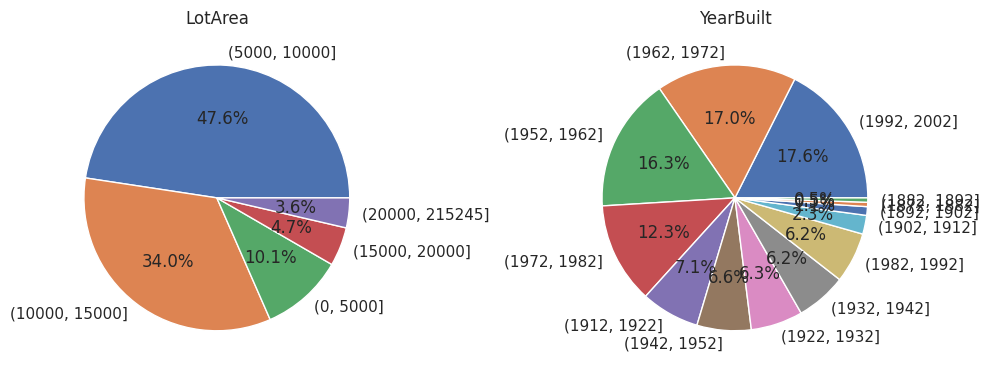

In [96]:
# Define bins for LotArea and YearBuilt
lot_area_bins = [0, 5000, 10000, 15000, 20000, max(data['LotArea'])]
year_built_bins = range(min(data['YearBuilt']), max(data['YearBuilt'])+1, 10)  # Binning by decade

# Bin the data
data['LotArea_bins'] = pd.cut(data['LotArea'], bins=lot_area_bins)
data['YearBuilt_bins'] = pd.cut(data['YearBuilt'], bins=year_built_bins)

# Calculate counts for LotArea and YearBuilt bins
lot_area_counts = data['LotArea_bins'].value_counts()
year_built_counts = data['YearBuilt_bins'].value_counts()

# Pie chart for LotArea bins
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(lot_area_counts, labels=lot_area_counts.index, autopct='%1.1f%%')
plt.title('LotArea')

# Pie chart for YearBuilt bins
plt.subplot(1, 2, 2)
plt.pie(year_built_counts, labels=year_built_counts.index, autopct='%1.1f%%')
plt.title('YearBuilt')

plt.tight_layout()
plt.show()


In [97]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [98]:
# Select all relevant columns
selected_columns = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
                    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                    'GarageCars', 'GarageArea', 'SalePrice']

data = data[selected_columns]

In [99]:
# Handle missing values
data.fillna(data.mean(), inplace=True)  # Fill missing values with mean

<ipython-input-99-99189bc14d78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)  # Fill missing values with mean


In [100]:
# Split the data into features and target
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

In [101]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Train the CatBoostRegressor model
model = CatBoostRegressor(iterations=3000, depth=6, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train, verbose=100)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

0:	learn: 72563.0290870	total: 2.11ms	remaining: 6.33s
100:	learn: 19025.6741525	total: 176ms	remaining: 5.04s
200:	learn: 14763.3704723	total: 350ms	remaining: 4.87s
300:	learn: 11569.1878385	total: 534ms	remaining: 4.79s
400:	learn: 9460.3917020	total: 718ms	remaining: 4.66s
500:	learn: 8068.6681801	total: 918ms	remaining: 4.58s
600:	learn: 7069.5086775	total: 1.08s	remaining: 4.33s
700:	learn: 6148.8326528	total: 1.43s	remaining: 4.68s
800:	learn: 5449.6373941	total: 1.6s	remaining: 4.41s
900:	learn: 4859.2781722	total: 1.77s	remaining: 4.13s
1000:	learn: 4318.0639752	total: 1.96s	remaining: 3.91s
1100:	learn: 3871.4809123	total: 2.13s	remaining: 3.68s
1200:	learn: 3463.3770500	total: 2.3s	remaining: 3.45s
1300:	learn: 3088.3652302	total: 2.48s	remaining: 3.23s
1400:	learn: 2774.8051645	total: 2.64s	remaining: 3.02s
1500:	learn: 2504.2222490	total: 2.81s	remaining: 2.81s
1600:	learn: 2263.4441662	total: 2.99s	remaining: 2.61s
1700:	learn: 2069.3096022	total: 3.16s	remaining: 2.41s
1

In [103]:
# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 813.0104931934158
Test RMSE: 27253.04348307409


In [104]:
# Specify the file path where you want to save the model
model_file_path = 'catboost_model_house_v2.cbm'

# Save the model
model.save_model(model_file_path, format="cbm")

In [105]:
X_test.iloc[0]

LotArea         8414
OverallQual        6
OverallCond        8
YearBuilt       1963
YearRemodAdd    2003
TotalBsmtSF     1059
1stFlrSF        1068
2ndFlrSF           0
GrLivArea       1068
FullBath           1
HalfBath           0
BedroomAbvGr       3
KitchenAbvGr       1
TotRmsAbvGrd       6
GarageCars         1
GarageArea       264
Name: 892, dtype: int64